In [2]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
training_set = pd.read_csv('boston_train.csv')
test_set = pd.read_csv('boston_test.csv')
prediction_set = pd.read_csv('boston_predict.csv')

In [4]:
training_set.head()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,MEDV
0,2.30040,0.0,19.58,0.605,6.319,96.1,2.1000,403,14.7,23.8
1,13.35980,0.0,18.10,0.693,5.887,94.7,1.7821,666,20.2,12.7
2,0.12744,0.0,6.91,0.448,6.770,2.9,5.7209,233,17.9,26.6
3,0.15876,0.0,10.81,0.413,5.961,17.5,5.2873,305,19.2,21.7
4,0.03768,80.0,1.52,0.404,7.274,38.3,7.3090,329,12.6,34.6


In [5]:
training_set.tail()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,MEDV
395,0.23912,0.0,9.69,0.585,6.019,65.3,2.4091,391,19.2,21.2
396,0.04560,0.0,13.89,0.550,5.888,56.0,3.1121,276,16.4,23.3
397,1.38799,0.0,8.14,0.538,5.950,82.0,3.9900,307,21.0,13.2
398,7.36711,0.0,18.10,0.679,6.193,78.1,1.9356,666,20.2,11.0
399,0.14150,0.0,6.91,0.448,6.169,6.6,5.7209,233,17.9,25.3


In [6]:
training_set.shape

(400, 10)

In [7]:
FEATURES:['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'TAX', 'PTRATIO']
LABEL = 'MEDV'   

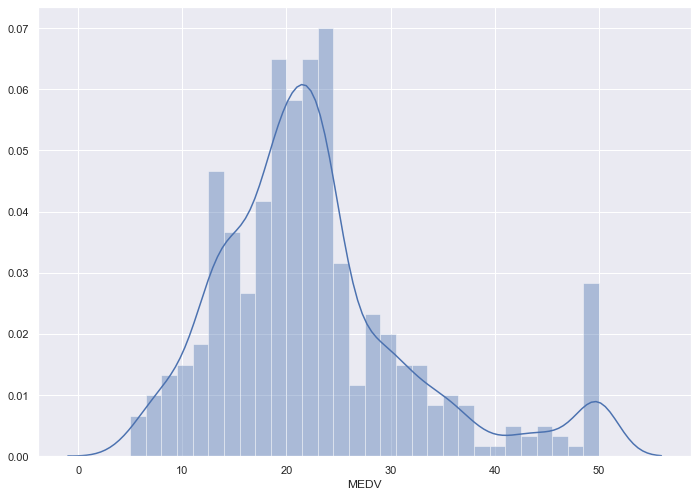

In [24]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(training_set['MEDV'], bins=30)
plt.show()

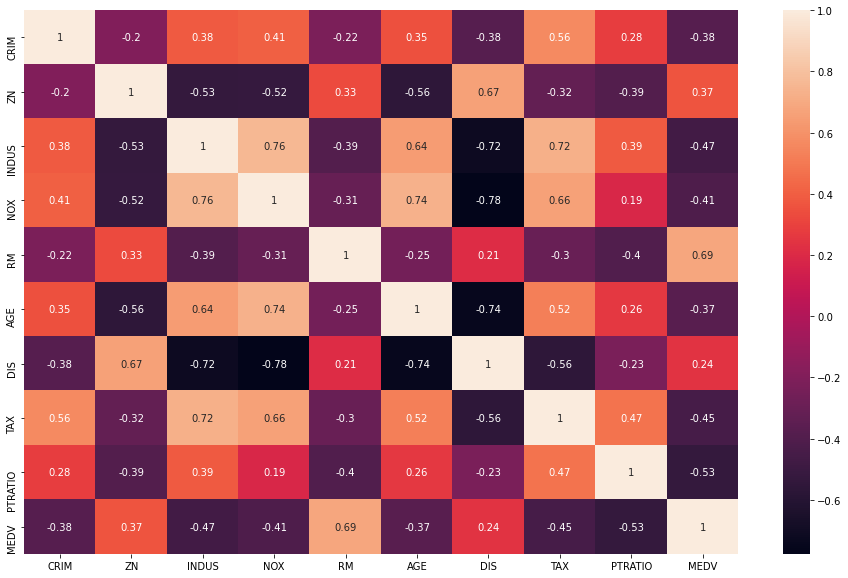

In [8]:
cor = training_set.corr()
plt.figure(figsize=(16,10))
sns.heatmap(cor, annot=True)

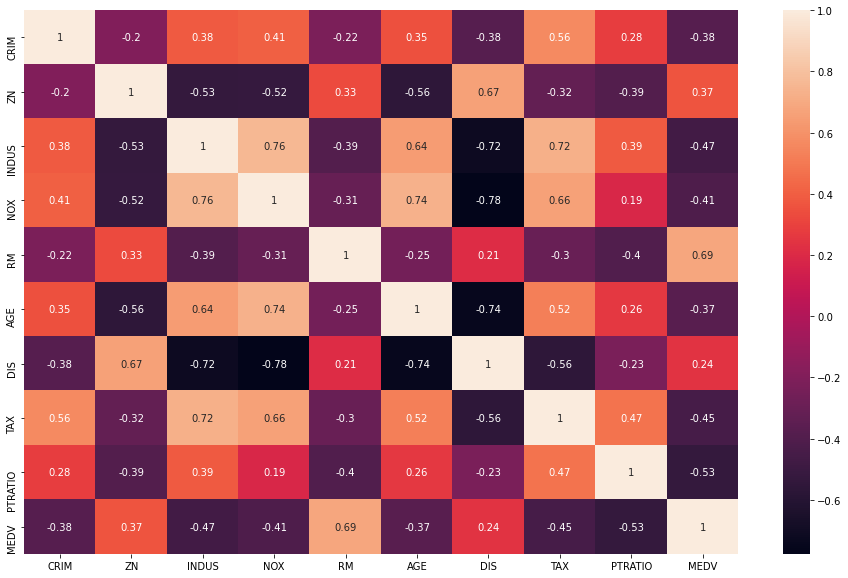

In [9]:
plt.figure(figsize=(16,10))
sns.heatmap(training_set.corr(), annot=True)

In [10]:
X_train = training_set[['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'TAX', 'PTRATIO']]
Y_train = training_set['MEDV']

In [11]:
training_set.isnull().sum()

CRIM       0
ZN         0
INDUS      0
NOX        0
RM         0
AGE        0
DIS        0
TAX        0
PTRATIO    0
MEDV       0
dtype: int64

## Preprocessing

In [12]:
# Normalize the data
from sklearn.preprocessing import normalize, scale
X_scale = scale(X_train)
X_norm = normalize(X_scale)

In [13]:
X_scale

array([[-0.17155637, -0.483311  ,  1.17133443, ...,  0.94740297,
        -0.05047626, -1.7587732 ],
       [ 1.01070306, -0.483311  ,  0.95997891, ...,  0.89825289,
         1.48379204,  0.79101332],
       [-0.40384768, -0.483311  , -0.63804019, ..., -2.32458832,
        -1.04220862, -0.27526104],
       ...,
       [-0.26909379, -0.483311  , -0.46238661, ...,  0.45239141,
        -0.61051336,  1.16189135],
       [ 0.37007931, -0.483311  ,  0.95997891, ...,  0.31547332,
         1.48379204,  0.79101332],
       [-0.40234465, -0.483311  , -0.63804019, ..., -2.19469167,
        -1.04220862, -0.27526104]])

## Build & Train Model

In [14]:
def build_model():
    # Define the model - Sequential Model
    # Activation function - ReLU, tf.nn.sigmoid
    model = keras.Sequential([
    layers.Dense(64, activation = tf.nn.relu ,
                 input_shape = [len(X_train.keys())]),
    layers.Dense(32, activation = tf.nn.relu),
    layers.Dense(1)
 ])
    #Model Optimizer - To optimize loss function
    optimizer = tf.keras.optimizers.RMSprop(0.001)
    model.compile(loss ='mean_squared_error',
                  optimizer = optimizer,
                  metrics = ['mean_absolute_error',
                            'mean_squared_error'])
    return model
    

In [15]:
model = build_model()

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                576       
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 2,689
Trainable params: 2,689
Non-trainable params: 0
_________________________________________________________________


In [17]:
EPOCHS = 1000
history = model.fit(X_norm, Y_train,
  epochs = EPOCHS, validation_split = 0.2, verbose = 0)

## Testing the Model

In [18]:
test_set.head()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,MEDV
0,0.13587,0.0,10.59,0.489,6.064,59.1,4.2392,277,18.6,24.4
1,0.08664,45.0,3.44,0.437,7.178,26.3,6.4798,398,15.2,36.4
2,0.26938,0.0,9.90,0.544,6.266,82.8,3.2628,304,18.4,21.6
3,0.05302,0.0,3.41,0.489,7.079,63.1,3.4145,270,17.8,28.7
4,0.06860,0.0,2.89,0.445,7.416,62.5,3.4952,276,18.0,33.2


In [19]:
X_test = test_set[['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'TAX', 'PTRATIO']]

In [20]:
Y_test = test_set['MEDV']

In [21]:
X_scale_test = scale(X_test)
X_norm_test = normalize(X_scale_test)

In [22]:
yhat = model.predict(X_norm_test)

In [23]:
from sklearn.metrics import mean_squared_error, r2_score
MSE = mean_squared_error(Y_test, yhat)
print(MSE)
r2_score(Y_test, yhat)

14.766822545501359


0.7370814111011954